<a href="https://colab.research.google.com/github/raafitt/GoogleColab/blob/Linear-Regression/Interpolate_T_F_PPF_Benz_RegressionModel_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установим необходимые версии библиотек

In [ ]:
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.1/527.1 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta

Импорт библиотек

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler,RobustScaler,MaxAbsScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import numpy as np
import autokeras as ak
from sklearn.linear_model import LinearRegression,LogisticRegression
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

Функция для отображения трендов

In [ ]:
def show_predict(y_pred, y_true, title=''):
    fig = plt.figure(figsize=(21, 7))
    # Прогнозный ряд сдвигается на 1 шаг назад, так как предсказание делалось на 1 шаг вперед
    plt.plot(y_pred, label=f'Вычисленное значение')
    plt.plot(y_true, label=f'Реальное значение')
    plt.title(title)

    # Показываем только целые метки шкалы оси x
    fig.gca().xaxis.get_major_locator().set_params(integer=True)
    plt.xlabel('Дата (относительно начала выборки)')
    plt.ylabel('Значение, м.д., ppm')
    plt.legend()
    plt.show()


### Подготовка обучающих данных

Создание датафрейма

In [ ]:
df=pd.read_csv('/content/t_f_ppf_benz_act.csv',sep=';')

Колонки с аналитическими данными

In [ ]:
ppf_benz_col=['PPF Hydrogen',
 'PPF propylene',
 'PPF propane',
 'PPF Methane',
 'PPF ethane',
 'PPF ethylene',
 'PPF PROPADIENE',
 'PPF butylene',
 'PPF methylacetylene',
 'PPF isobutane',
 'PPF n-butane',
 'PPF butadiene',
 'PPF hydrocarbons C5',
 'PPF density',
 'Benzene benzene',
 'Benzene nonaromatic C6',
 'Benzene nonaromatic ',
 'Benzene toluene',
 'Benzene ethylbenzene',
 'Benzene cumene ',
 'Benzene n-propylbenzene',
 'Benzene PAB ',
 'Benzene Water',]

Колонки с технологическими данными

In [ ]:
T_F_col=['TICA-103',
 'TISA-137',
 'TISA-140',
 'FICA-607',
 'FICA-606',
 'FICA-114',
 'FICA-106',
 'FICA-105',
 'FICA-104',]

Замена запятых на точки и заполнение пустых ячеек с помощью линейной интерполяции

In [ ]:
labels=df[label_columns].replace({',':'.'},regex=True).astype('float32')

In [ ]:
labels.interpolate(inplace=True)

In [ ]:
ppf_benz=df[ppf_benz_col].replace({',':'.'},regex=True).astype('float32')

In [ ]:
ppf_benz.iloc[[i for i in range(len(df)) if i % 8 != 0]] = np.nan

In [ ]:
ppf_benz.interpolate(inplace=True)

In [ ]:
t_f=df[T_F_col].replace({',':'.'},regex=True).astype('float32')
t_f.dropna(inplace=True)

In [ ]:
x=pd.concat([t_f,ppf_benz,labels],axis=1)
x.drop(index=19664,inplace=True)

In [ ]:
labels

,Label nonaromatic,Label toluene,Label ethylbenzene,Label cumene,Label n-propylbenzene,Label Timolol,Label butylbenzene,Label benzene,Label DIPB,Label TIPB,Label PAB,Label Water
0,1.32000,0.00,0.001000,44.650002,0.01,0.00,0.01000,41.959999,7.5200,0.03000,0.5000,4.000000
1,1.32125,0.00,0.001000,44.661251,0.01,0.00,0.01025,42.421249,7.5375,0.03125,0.5075,4.250000
2,1.32250,0.00,0.001000,44.672501,0.01,0.00,0.01050,42.882500,7.5550,0.03250,0.5150,4.500000
3,1.32375,0.00,0.001000,44.683750,0.01,0.00,0.01075,43.343750,7.5725,0.03375,0.5225,4.750000
4,1.32500,0.00,0.001000,44.695000,0.01,0.00,0.01100,43.805000,7.5900,0.03500,0.5300,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
19660,0.73000,0.01,0.008500,47.930000,0.02,0.01,0.00400,44.160000,6.7700,0.02000,0.3400,38.549999
19661,0.71500,0.01,0.008375,47.997501,0.02,0.01,0.00400,44.092499,6.7850,0.02000,0.3400,38.437500
19662,0.70000,0.01,0.008250,48.065002,0.02,0.01,0.00400,44.025002,6.8000,0.02000,0.3400,38.324997
19663,0.68500,0.01,0.008125,48.132500,0.02,0.01,0.00400,43.957500,6.8150,0.02000,0.3400,38.212498


### Загрузка модели, обучение, предсказание

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/best_regression_model_inter_val_mse_0_5.keras')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.reshape(np.array(x),(2458,8,44)), np.reshape(np.array(labels[1:19665]),(2458,8,12)), test_size=0.03, random_state=42)

In [ ]:
train=[]
test=[]
for y in y_train:
  train.append(y[7])
for y in y_test:
  test.append(y[7])

train=np.array(train)
test=np.array(test)

In [ ]:
x_train_reshaped = x_train.reshape((x_train.shape[0], -1))
x_test_reshaped = x_test.reshape((x_test.shape[0], -1))

# Определение и обучение модели регрессии
regressor = ak.StructuredDataRegressor(max_trials=10)  # max_trials - число испытаний для подбора гиперпараметров

history=regressor.fit(x_train_reshaped,train, validation_data=(x_test_reshaped,test), epochs=60)


# Экспорт лучшей модели
best_model = regressor.export_model()
best_model.save("best_regression_model_inter.keras")

Trial 10 Complete [00h 01m 29s]
val_loss: 1.794219970703125

Best val_loss So Far: 0.8019100427627563
Total elapsed time: 00h 15m 14s
Epoch 1/60
75/75 [==============================] - 7s 39ms/step - loss: 69.7624 - mean_squared_error: 69.7624 - val_loss: 12.1287 - val_mean_squared_error: 12.1287
Epoch 2/60
75/75 [==============================] - 1s 9ms/step - loss: 10.6359 - mean_squared_error: 10.6359 - val_loss: 8.7308 - val_mean_squared_error: 8.7308
Epoch 3/60
75/75 [==============================] - 1s 9ms/step - loss: 6.5409 - mean_squared_error: 6.5409 - val_loss: 6.2899 - val_mean_squared_error: 6.2899
Epoch 4/60
75/75 [==============================] - 1s 9ms/step - loss: 5.1168 - mean_squared_error: 5.1168 - val_loss: 5.7744 - val_mean_squared_error: 5.7744
Epoch 5/60
75/75 [==============================] - 1s 9ms/step - loss: 4.0939 - mean_squared_error: 4.0939 - val_loss: 5.2869 - val_mean_squared_error: 5.2869
Epoch 6/60
75/75 [==============================] - 1s 9ms/

In [ ]:
best_model.evaluate(x_test_reshaped,test)

3/3 [==============================] - 5s 28ms/step - loss: 0.5308 - mean_squared_error: 0.5308


[0.5307666063308716, 0.5307666063308716]

In [ ]:
preds=best_model.predict(x_test_reshaped)

3/3 [==============================] - 3s 17ms/step


In [ ]:
cumene_pred=[]
npb_pred=[]
benzene_pred=[]
water_pred=[]
toluene_pred=[]
timolol_pred=[]
butylbenzene_pred=[]
DIPB_pred=[]
PAB_pred=[]
TIPB_pred=[]
nonaromatic_pred=[]
ethylbenzene_pred=[]
for pred in preds:
  cumene_pred.append(pred[3])
  npb_pred.append(pred[4])
  benzene_pred.append(pred[7])
  water_pred.append(pred[11])
  TIPB_pred.append(pred[9])
  PAB_pred.append(pred[10])
  DIPB_pred.append(pred[8])
  butylbenzene_pred.append(pred[6])
  timolol_pred.append(pred[5])
  toluene_pred.append(pred[1])
  nonaromatic_pred.append(pred[0])
  ethylbenzene_pred.append(pred[2])


In [ ]:
cumene_y=[]
npb_y=[]
benzene_y=[]
water_y=[]
toluene_y=[]
timolol_y=[]
butylbenzene_y=[]
DIPB_y=[]
PAB_y=[]
TIPB_y=[]
nonaromatic_y=[]
ethylbenzene_y=[]
for y in test:
  cumene_y.append(y[3])
  npb_y.append(y[4])
  benzene_y.append(y[7])
  water_y.append(y[11])
  TIPB_y.append(y[9])
  PAB_y.append(y[10])
  DIPB_y.append(y[8])
  butylbenzene_y.append(y[6])
  timolol_y.append(y[5])
  toluene_y.append(y[1])
  nonaromatic_y.append(y[0])
  ethylbenzene_y.append(y[2])

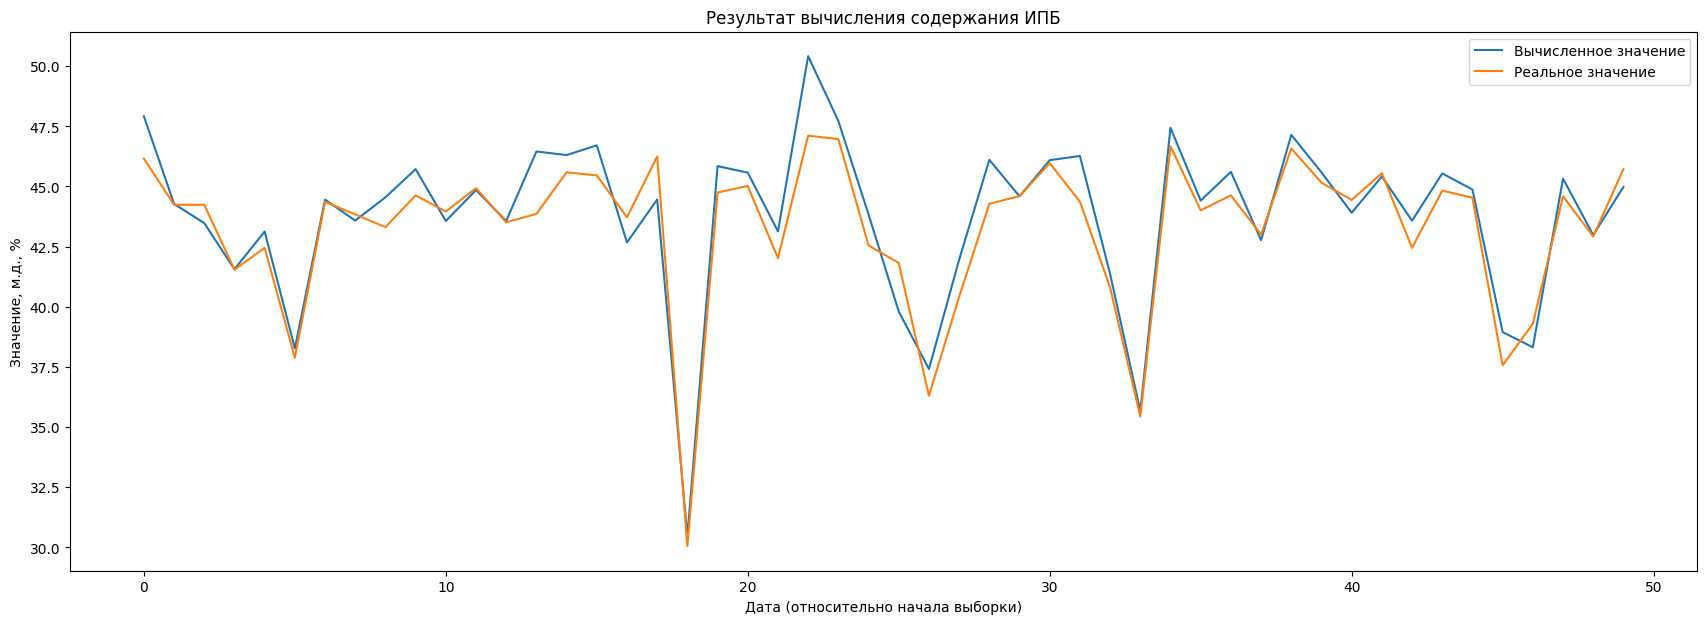

In [ ]:
show_predict(cumene_pred[:50],cumene_y[:50],'Результат вычисления содержания ИПБ')

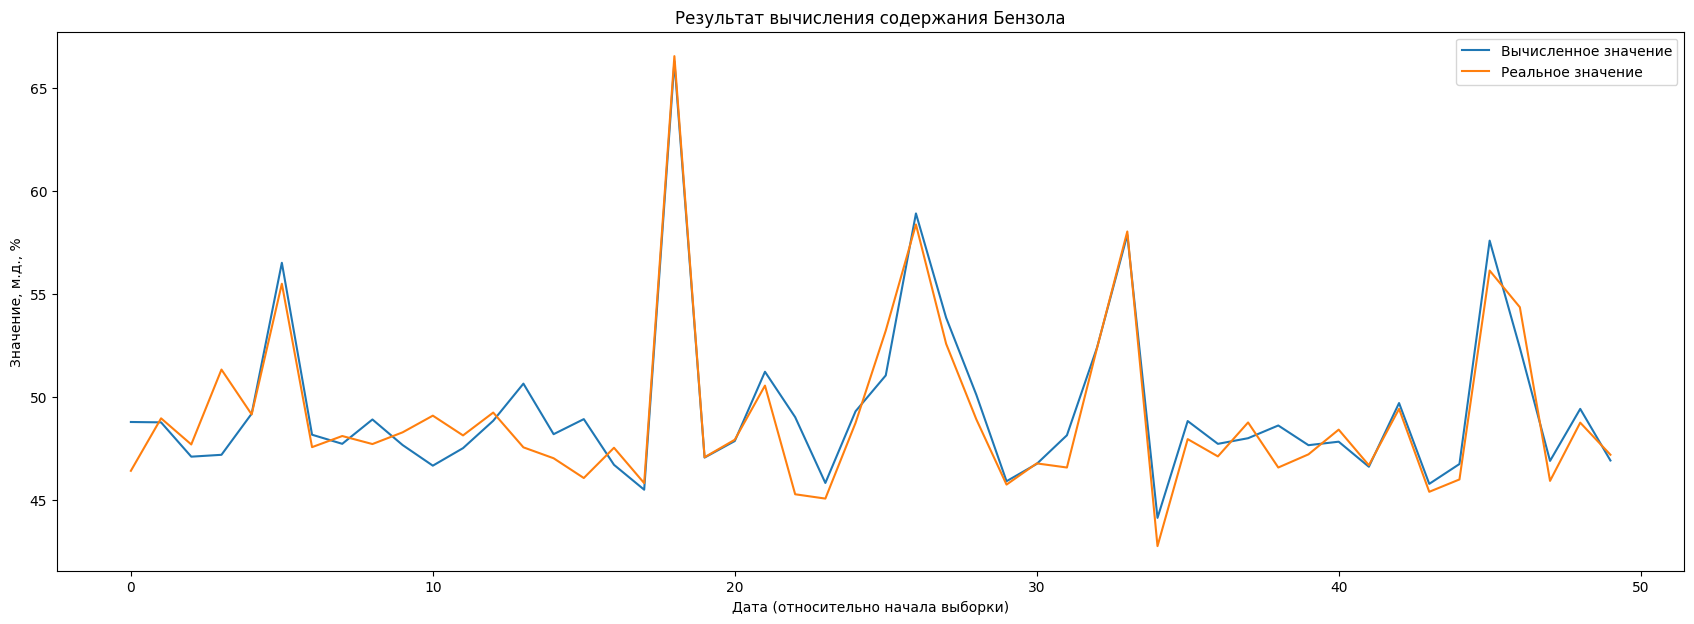

In [ ]:
show_predict(benzene_pred[:50],benzene_y[:50],'Результат вычисления содержания Бензола')

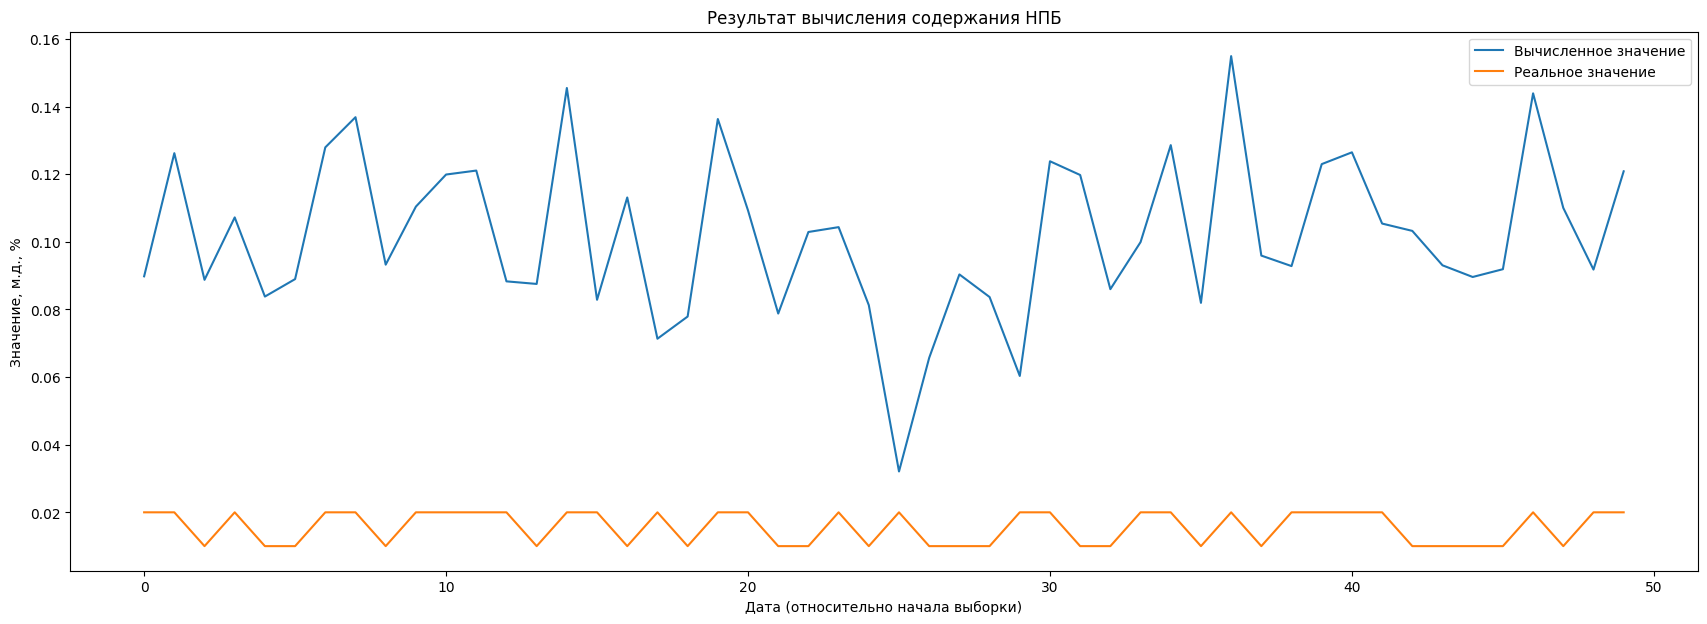

In [ ]:
show_predict(npb_pred[:50],npb_y[:50],'Результат вычисления содержания НПБ')

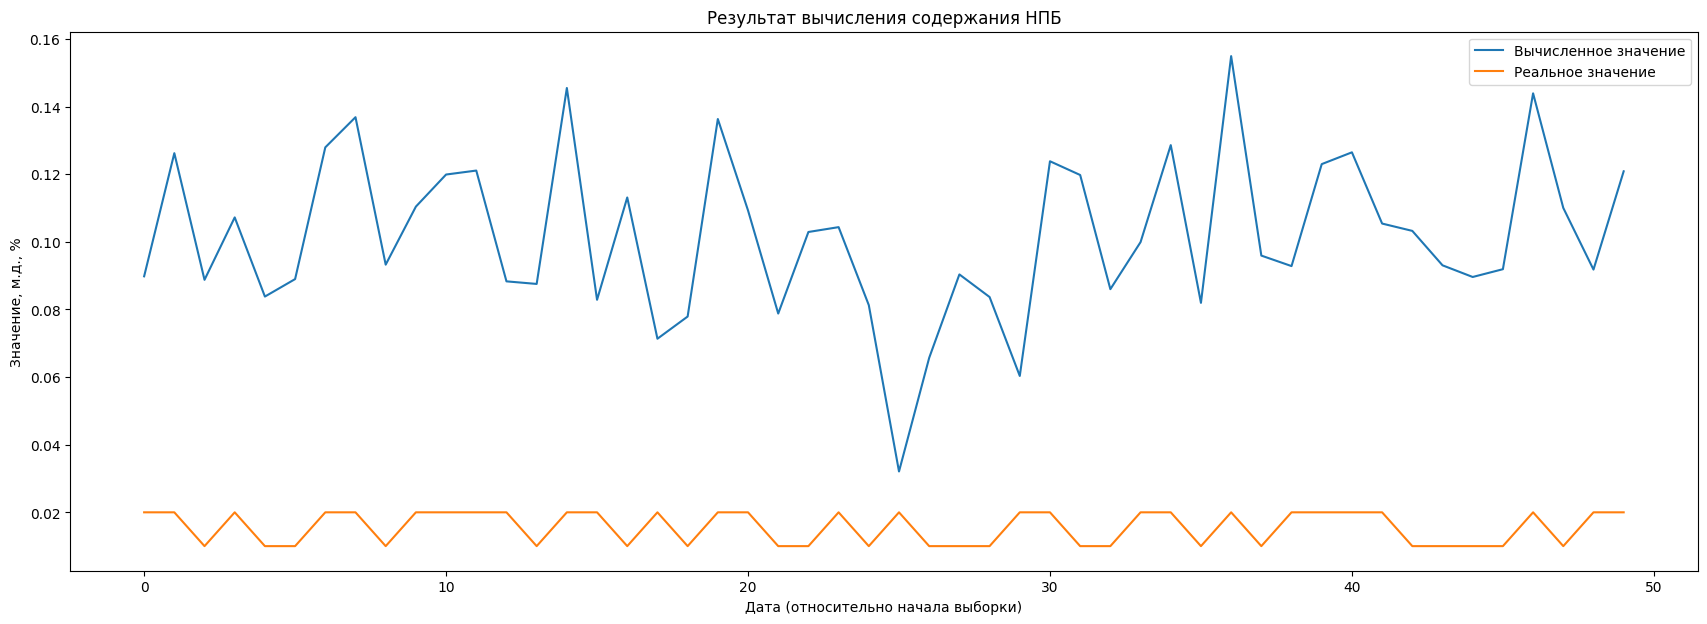

In [ ]:
show_predict(npb_pred[:50],npb_y[:50],'Результат вычисления содержания НПБ')

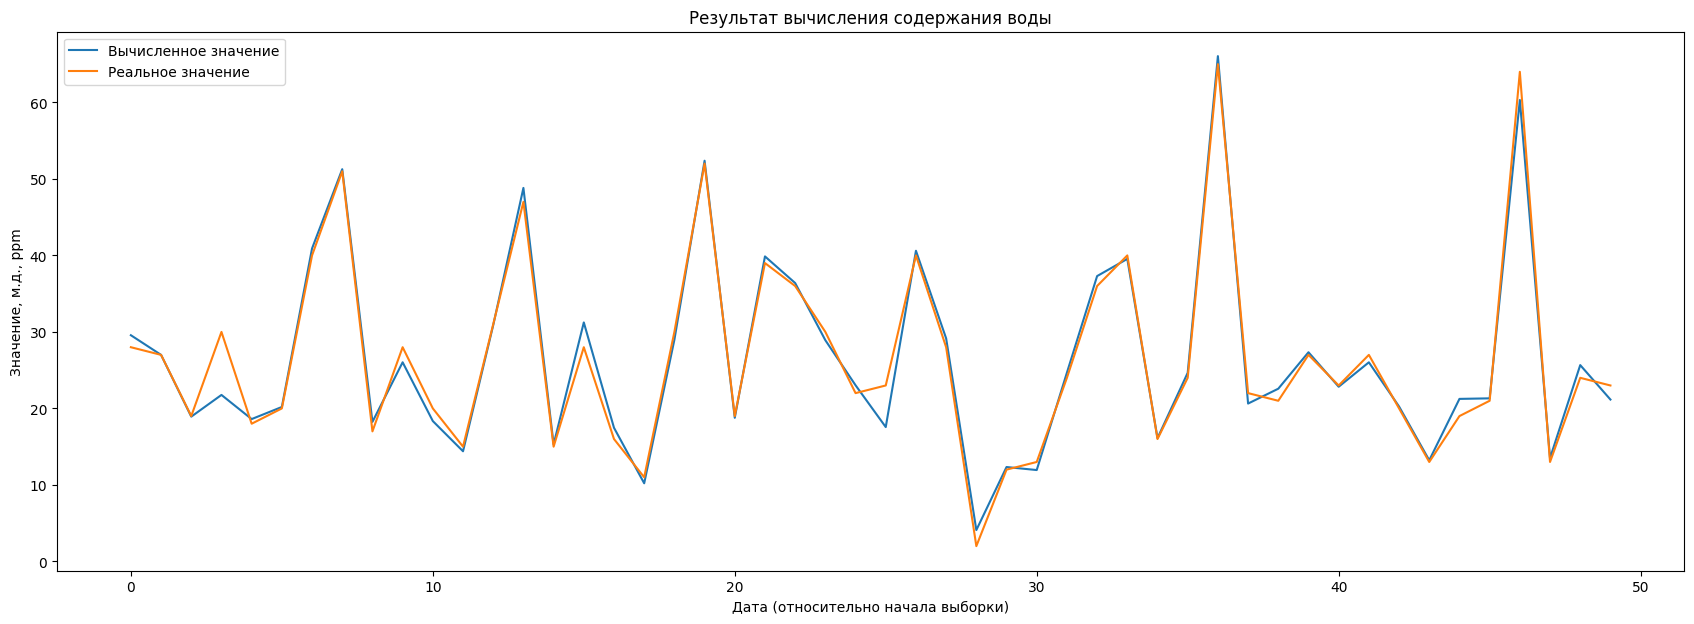

In [ ]:
show_predict(water_pred[:50],water_y[:50],'Результат вычисления содержания воды')

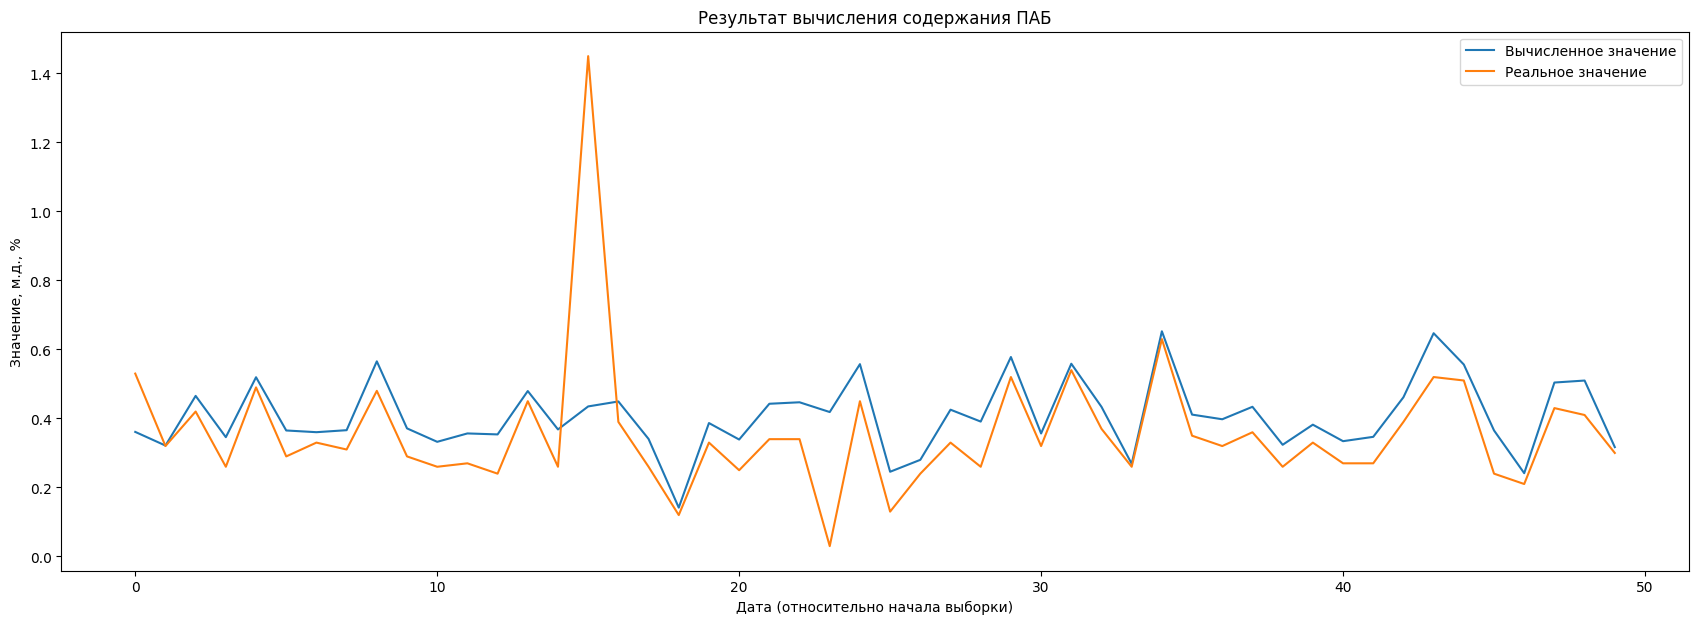

In [ ]:
show_predict(PAB_pred[:50],PAB_y[:50],'Результат вычисления содержания ПАБ')

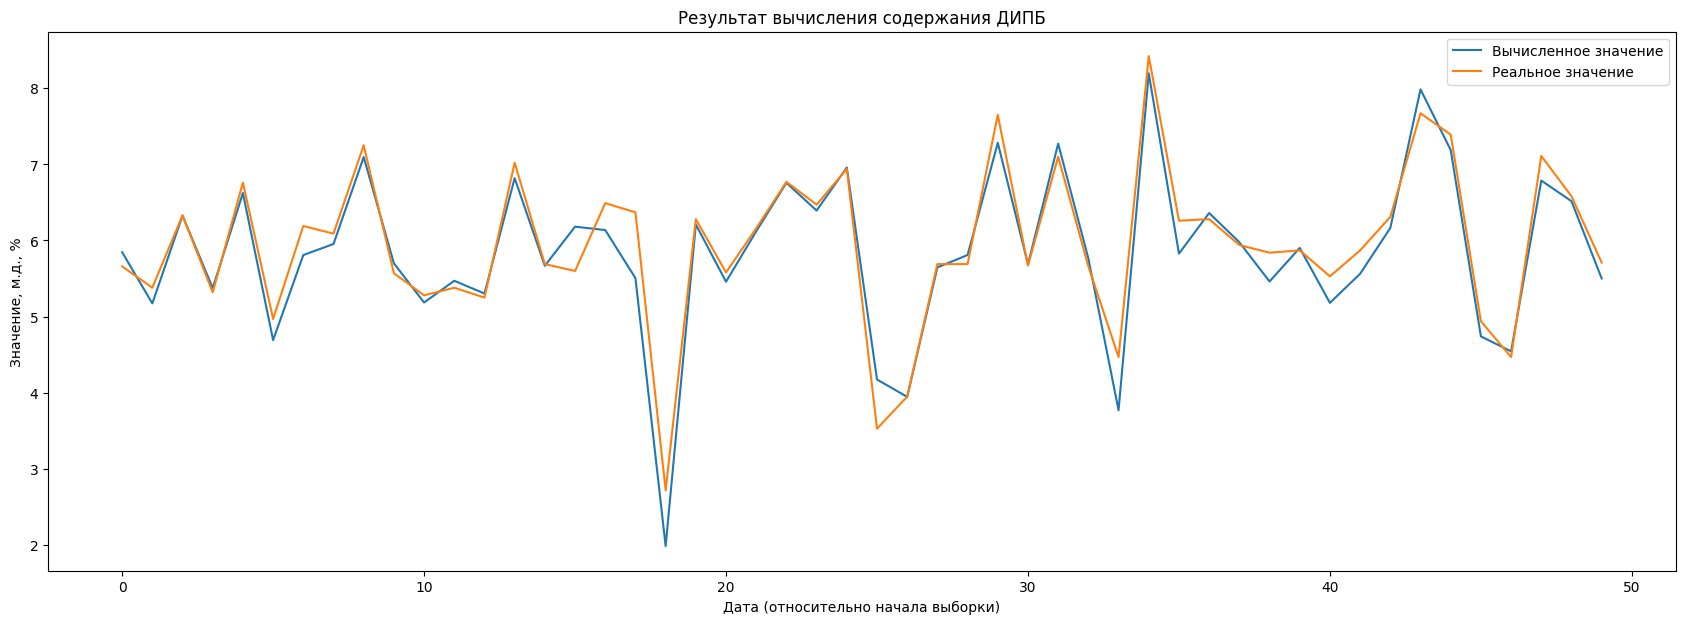

In [ ]:
show_predict(DIPB_pred[:50],DIPB_y[:50],'Результат вычисления содержания ДИПБ')

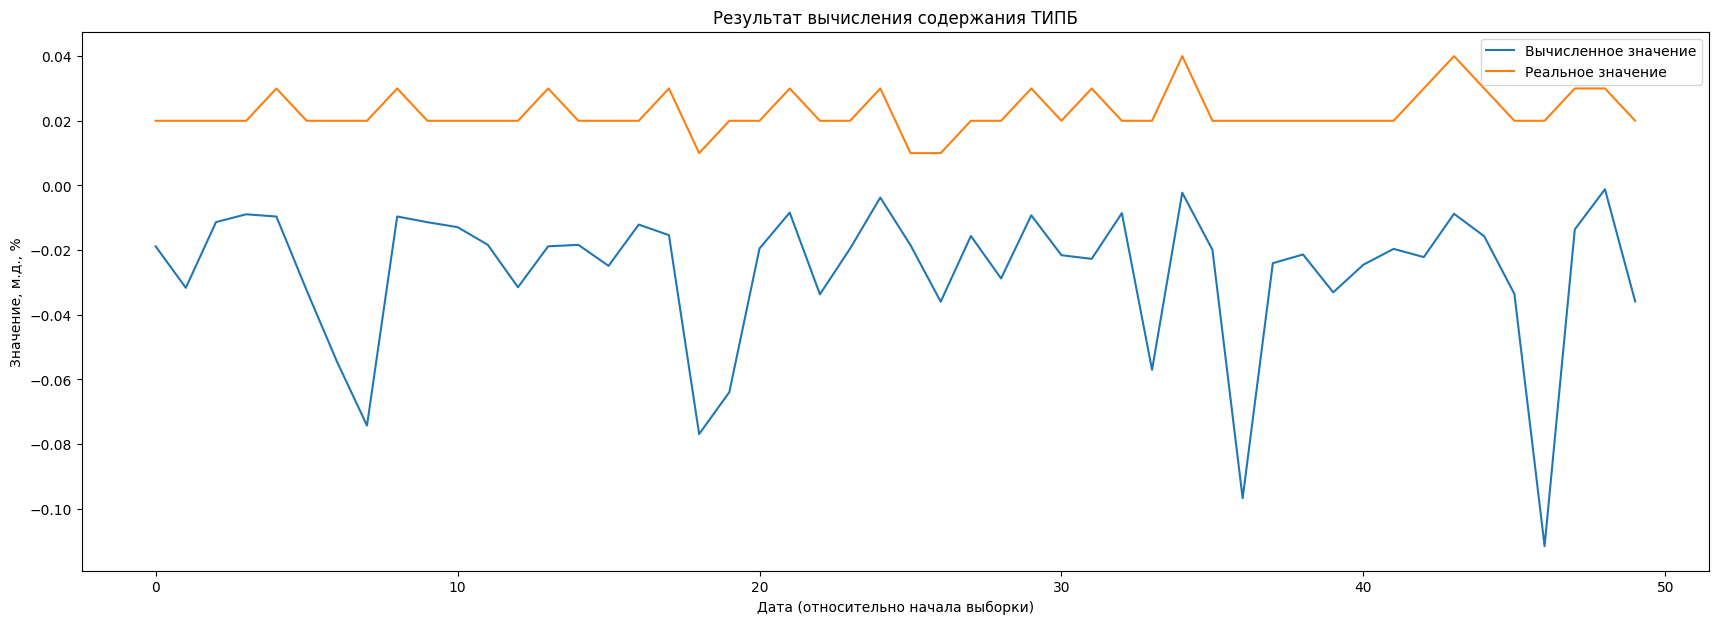

In [ ]:
show_predict(TIPB_pred[:50],TIPB_y[:50],'Результат вычисления содержания ТИПБ')

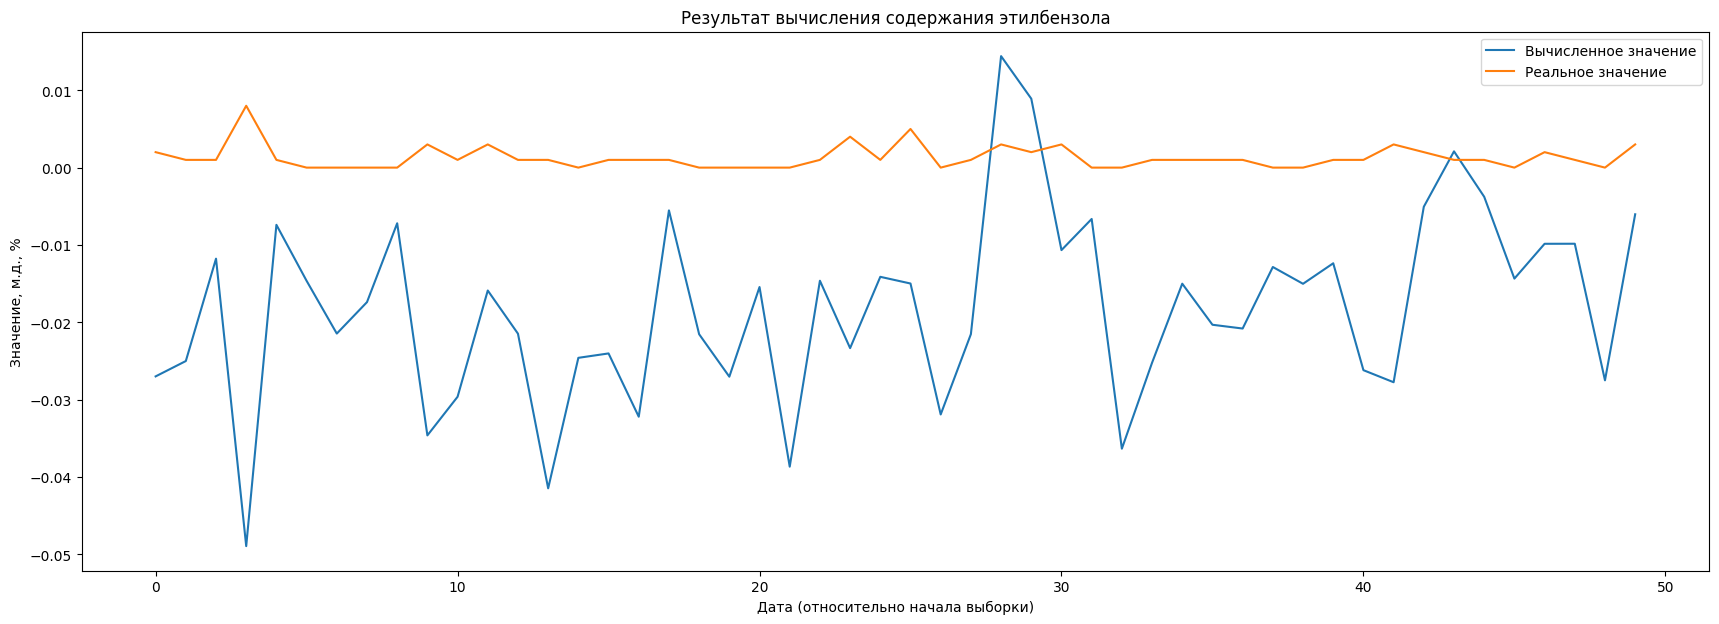

In [ ]:
show_predict(ethylbenzene_pred[:50],ethylbenzene_y[:50],'Результат вычисления содержания этилбензола')

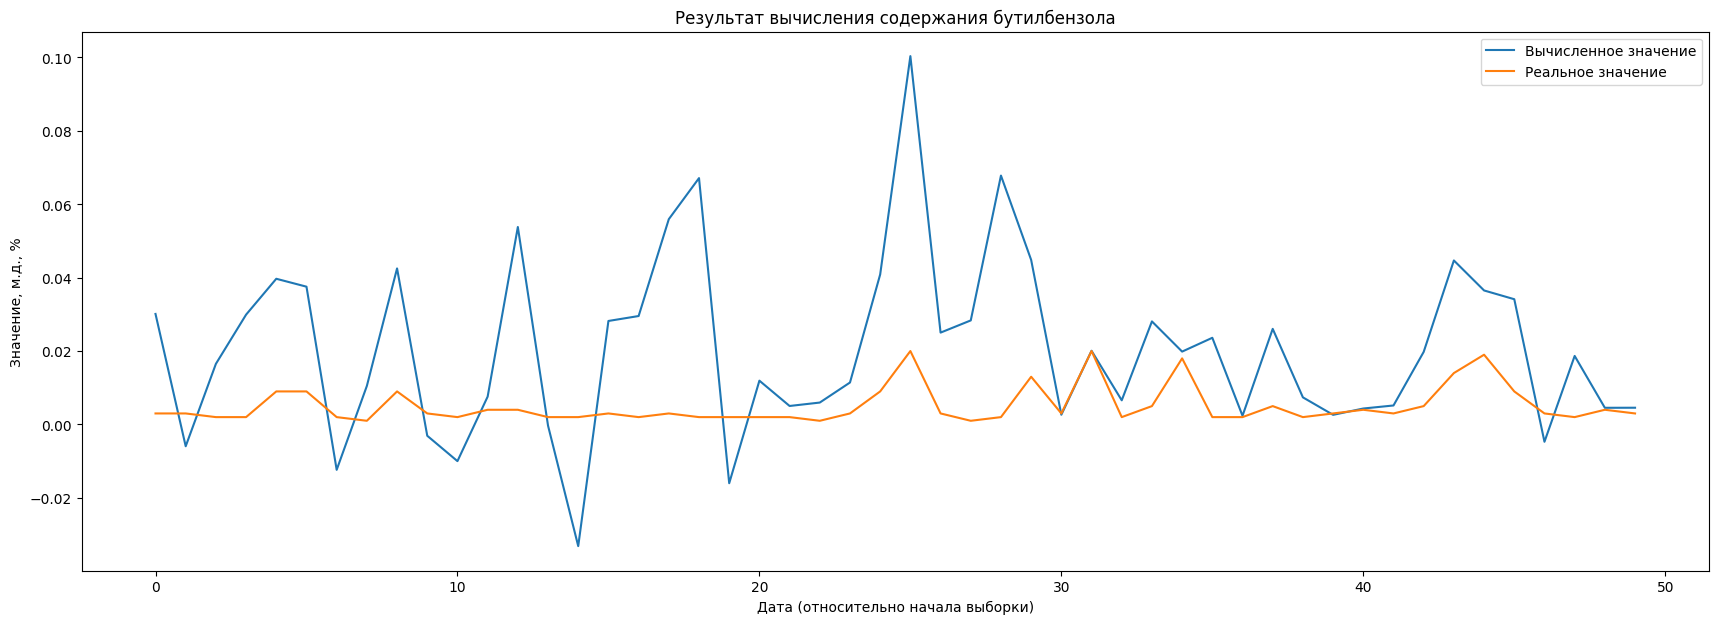

In [ ]:
show_predict(butylbenzene_pred[:50],butylbenzene_y[:50],'Результат вычисления содержания бутилбензола')

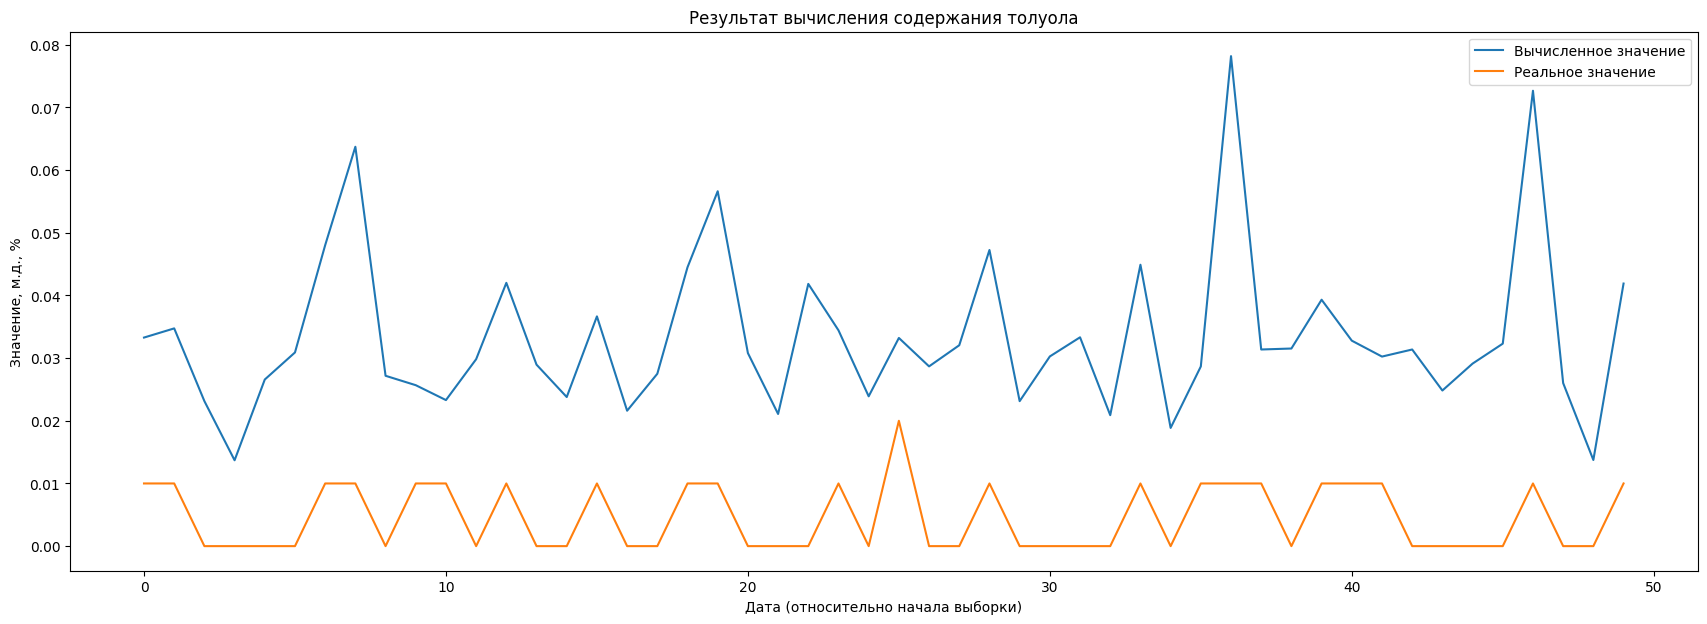

In [ ]:
show_predict(toluene_pred[:50],toluene_y[:50],'Результат вычисления содержания толуола')

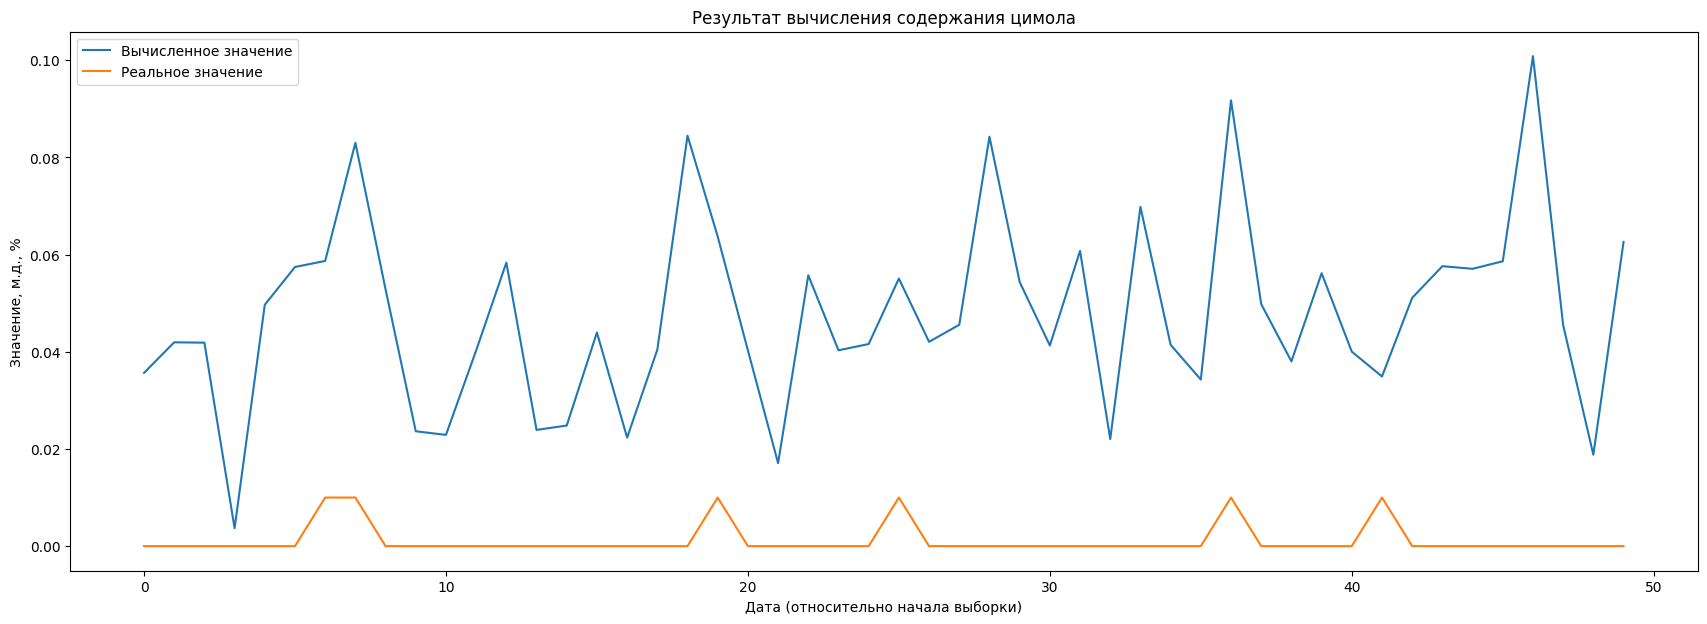

In [ ]:
show_predict(timolol_pred[:50],timolol_y[:50],'Результат вычисления содержания цимола')